<a href="https://colab.research.google.com/github/AnjanaSengupta/MLE-Oct-2022/blob/main/MidTerm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import *
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score

In [ ]:
OS_DF = pd.read_csv('/content/drive/MyDrive/FourthBrain MidTerm/online_shoppers_intention.csv')

In [ ]:
OS_DF.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
OS_DF.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
print(OS_DF[OS_DF["Revenue"] == True].shape[0])
print(OS_DF[OS_DF["Revenue"] == False].shape[0])

1908
10422


In [ ]:
1908/10422

0.18307426597582038

Approximately 18.3% resulted in a purchase and approximately 82% did not. 

In [ ]:
OS_DF.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

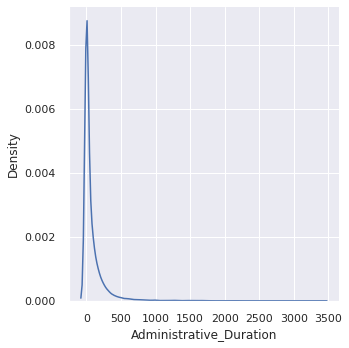

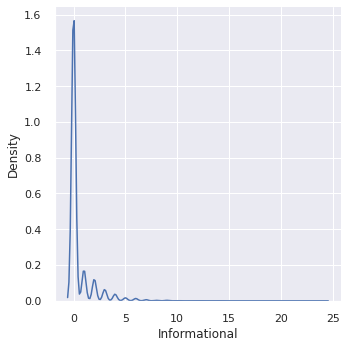

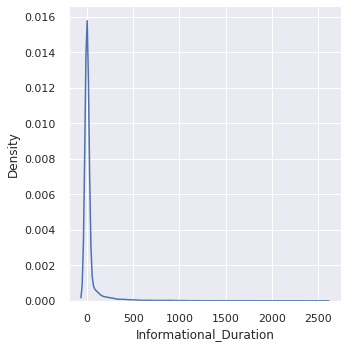

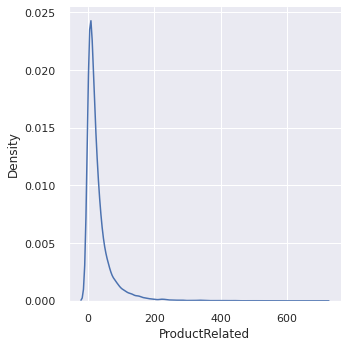

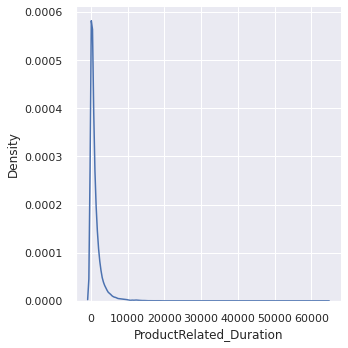

In [ ]:
%matplotlib inline
sns.set()
for pageTypeColName in OS_DF.iloc[:,1:6].columns:
  sns.displot((OS_DF[pageTypeColName]), kind="kde",)
 

The above plots not only all peak around 0, but also have very long tails. These are very skewed distributions. Log transformation is one way to take care of the skew.

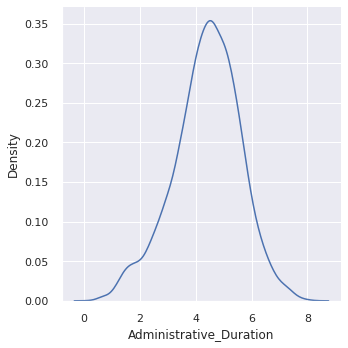

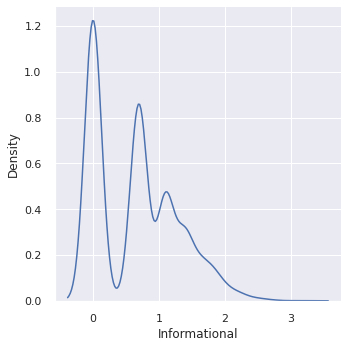

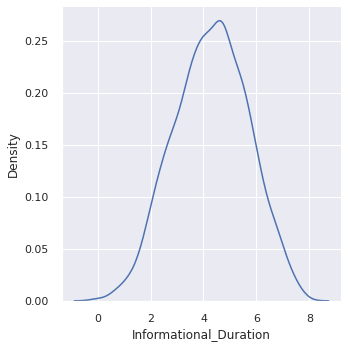

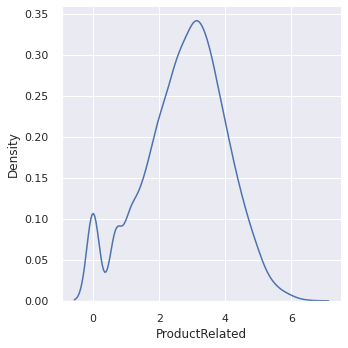

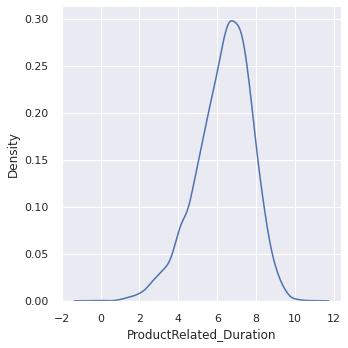

In [ ]:
for pageTypeColName in OS_DF.iloc[:,1:6].columns:
  sns.displot(np.log(OS_DF[pageTypeColName]), kind="kde",) 
  # Log function is a good transformation for variables that are skewed like the way above 
  # KDE is kernel density estimation - using a continuous probability density curve

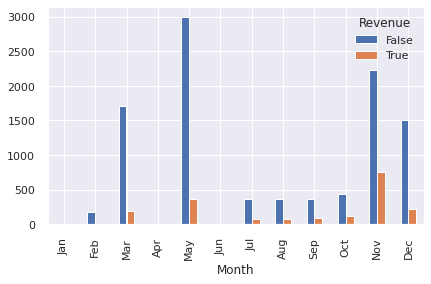

In [ ]:

Rev_by_month = OS_DF.copy()
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
Rev_by_month['Month'] = pd.Categorical(Rev_by_month['Month'], categories=months, ordered=True)
Rev_by_month.pivot_table(index=['Month'],columns='Revenue',aggfunc='size').plot(kind='bar')

Checking out how Revenue varies over the year. Four months (Mar, May, Nov, Dec) have the most revenue and also the most number of transactions. Jan (post holidays) is practically non-existent and the summer months are low.

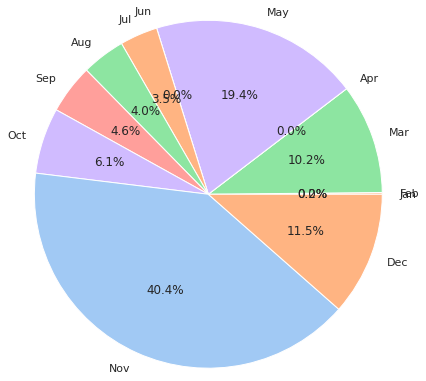

In [ ]:
# Calculating the percentage - 40% in Nov, 20% in May, and rest through the year
revenueData=Rev_by_month[OS_DF["Revenue"] == True]
revenueMonthsCount =revenueData.groupby("Month").size().reset_index(name="Percentage")

revenueMonthsCount["Percentage"]= np.round((revenueMonthsCount["Percentage"]/revenueData.shape[0])*100,2)
colors = sns.color_palette('pastel')[0:5]
plt.pie(revenueMonthsCount["Percentage"],labels= revenueMonthsCount["Month"], colors = colors, autopct='%.1f%%',radius=2)
plt.show()

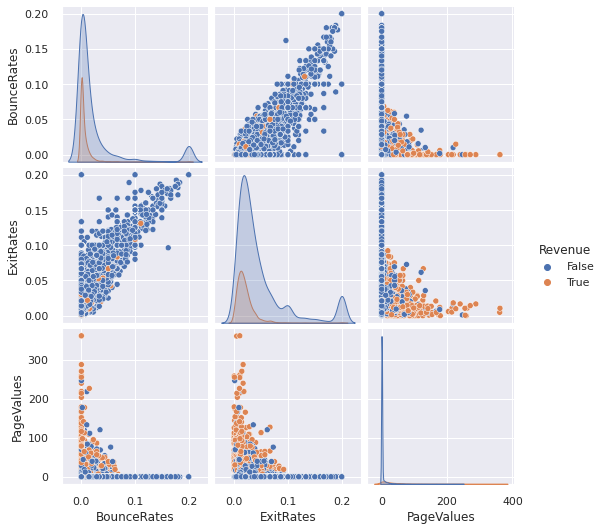

In [ ]:
sns.pairplot(Rev_by_month[["BounceRates","ExitRates","PageValues","Revenue"]], hue="Revenue")

Bounce Rate and Exit Rates are obviously highly positively correlated. Not sure what PageValues really captures, but it seems as though the Revenue = True uses more PageValues.

In [ ]:
# Map the binary columns
for label,content in OS_DF[["Revenue","Weekend"]].items():
    # Apply the mapping to the current column with the map() method for Pandas Series
    OS_DF[label] = content.map({ True : 1 , False : 0})

monthMapping = {'May' : 5, 'June' : 6, 'Jul' : 7, 'Aug' : 8, 'Oct' : 10, 'Nov' : 11, 'Dec' : 12, 'Jan' : 1, 'Feb' : 2,
       'Mar' : 3, 'Apr' : 4, 'Sep' : 9}
# # Map the months
OS_DF['Month'] = OS_DF['Month'].map(monthMapping)

In [ ]:
OS_DF.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000


In [ ]:
#For VisitorType hot-encoding is better than mapping
categorical_columns = OS_DF.select_dtypes("object").columns
# One-hot encode the categorical features with the get_dummies() function for Pandas DataFrames
OS_DF = pd.get_dummies(OS_DF)

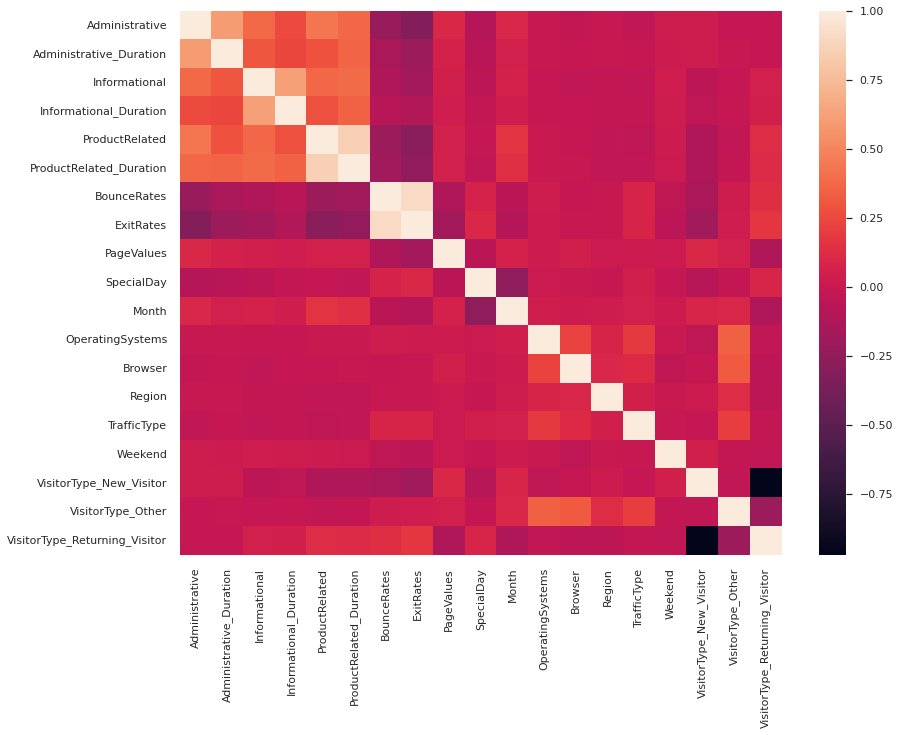

In [ ]:
#Extract target feature before dropping correlated features
y = OS_DF.pop("Revenue")

plt.figure(figsize=(12,10))
# Now its the moment to delete correlated features that doest give us more information but can penalize the model training time
corr = OS_DF.corr(method="pearson")
sns.heatmap(corr)
plt.show()

In [ ]:
columnsKeeped = np.full((corr.shape[0],), True, dtype=bool)
#If the correlation is greater equal than the threshold the feature is removed
threshold = 0.90
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= threshold:
            if columnsKeeped[j]:
                columnsKeeped[j] = False
selected_columns = OS_DF.columns[columnsKeeped]
OS_ReducedDF = OS_DF[selected_columns].copy()

In [ ]:
OS_ReducedDF.head(7)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.0,0.0,2,1,1,1,1,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.0,0.0,2,2,2,1,2,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.0,0.0,2,4,1,9,3,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.0,0.0,2,3,2,2,4,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.0,0.0,2,3,3,1,4,1,0,0,1
5,0,0.0,0,0.0,19,154.216667,0.015789,0.0,0.0,2,2,2,1,3,0,0,0,1
6,0,0.0,0,0.0,1,0.000000,0.200000,0.0,0.4,2,2,4,3,3,0,0,0,1


In [ ]:
trans = StandardScaler()

normalizedFeaturesColumnNames=["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates"]
normalizedFeatures=OS_ReducedDF[normalizedFeaturesColumnNames].copy()
normalizedData = trans.fit_transform(normalizedFeatures)
OS_ReducedDF[normalizedFeaturesColumnNames]=normalizedData

In [ ]:
OS_ReducedDF["Target"]=y
OS_ReducedDF.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Target
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,0.0,0.0,2,1,1,1,1,0,0,0,1,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,0.0,0.0,2,2,2,1,2,0,0,0,1,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,0.0,0.0,2,4,1,9,3,0,0,0,1,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,0.0,0.0,2,3,2,2,4,0,0,0,1,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.0,0.0,2,3,3,1,4,1,0,0,1,0
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.543757,-0.132035,0.0,0.0,2,2,2,1,3,0,0,0,1,0
6,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,0.0,0.4,2,2,4,3,3,0,0,0,1,0
7,-0.395938,-0.457191,-0.396478,-0.244931,-0.713488,-0.624348,3.667189,0.0,0.0,2,1,2,1,5,1,0,0,1,0
8,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.605012,-0.457683,0.0,0.8,2,2,2,2,3,0,0,0,1,0
9,-0.696993,-0.457191,-0.396478,-0.244931,-0.646033,-0.238685,-0.457683,0.0,0.4,2,2,4,1,2,0,0,0,1,0


In [ ]:
trainMonths=[6,7,8,9,10,11,12]  # June - December goes to the Training Set - Not sure I understand why and where is May?
testMonths=[2,3]                # Feb - Mar goes into Test Set

#June-Dec, and test the model on data entries corresponding to Feb-March
trainingDf = OS_ReducedDF[OS_DF['Month'].isin(trainMonths)]
testDf = OS_ReducedDF[OS_DF['Month'].isin(testMonths)]

y_train=trainingDf.pop("Target")
X_train=trainingDf.to_numpy()

y_test=testDf.pop("Target")
X_test=testDf.to_numpy()

There are two months with no transactions - January and June. Feb has no Revenue. May has the second highest amount of Revenue, but it's not in the Train or the Test. Why are we discarding May? The 4 months with most Revenue are Mar, May, Nov, Dec. We're using Mar in Test, Nov and Dec in Train, and we are throwing away May? It doesn't make sense. Moreoever, we're using Test to include Feb and Mar and Feb has no Revenue. These are very, very imbalanced sets and unlikely to give good results.

In [ ]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,6875.000000,6875.000000,6875.000000,6875.000000,6875.000000,6875.000000,6875.000000,6875.000000,6875.0,6875.000000,6875.000000,6875.000000,6875.000000,6875.000000,6875.000000,6875.000000,6875.000000,6875.000000
mean,0.101559,0.056133,0.057601,0.038999,0.144419,0.119989,-0.058235,6.782225,0.0,10.391273,2.144000,2.374255,3.197964,4.152145,0.239127,0.166109,0.012364,0.821527
std,1.071415,1.046687,1.050634,1.108243,1.178077,1.166070,0.915109,20.573444,0.0,1.685546,1.006485,1.868924,2.473531,4.326217,0.426582,0.372206,0.110510,0.382938
min,-0.696993,-0.457191,-0.396478,-0.244931,-0.713488,-0.624348,-0.457683,0.000000,0.0,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.696993,-0.457191,-0.396478,-0.244931,-0.511122,-0.506883,-0.457683,0.000000,0.0,10.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,-0.395938,-0.332737,-0.396478,-0.244931,-0.241299,-0.253283,-0.388163,0.000000,0.0,11.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000
75%,0.507228,0.152634,-0.396478,-0.244931,0.298346,0.288545,-0.144454,0.000000,0.0,12.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000
max,7.431499,18.769559,10.626234,17.868683,14.711358,32.806777,3.667189,361.763742,0.0,12.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
logisticRegressionModel = LogisticRegression(random_state=0, class_weight='balanced',solver="liblinear",max_iter=150,penalty="l1").fit(X_train, y_train)
logisticModelPrediction = logisticRegressionModel.predict(X_test)

Accuracy = 0.9426111908177905, Precision = 0.6482213438735178, Recall = 0.841025641025641, F1-score = 0.7321428571428572


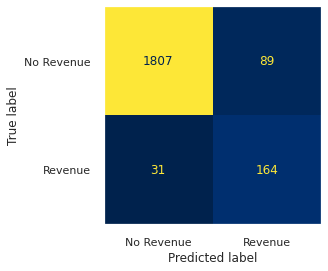

In [ ]:
def printMetrics(testTarget,modelPrediction):
    confMatrix = confusion_matrix(testTarget, modelPrediction)
    acc   = accuracy(testTarget, modelPrediction)
    rec   = recall(testTarget, modelPrediction)
    prec  = precision(testTarget, modelPrediction)
    f1    = f1_score(testTarget, modelPrediction)
    print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')

printMetrics(y_test,logisticModelPrediction)
plot_confusion_matrix(logisticRegressionModel,X_test,y_test, display_labels=['No Revenue', 'Revenue'],cmap="cividis",colorbar=False)
plt.grid(False)

Although Accuracy is great (0.94) Precision is only moderately so (0.65), while Recall is better (0.84). This is an example of how Accuracy can be great and at the same time, the Precision is not good (or in this case, only moderately so). When there is an imbalance (that is the case in the way Test has been created)  and the model does a good job of predicting the 'No Revenues', which it can as there are many more cases of it, Accuracy can be great though the Precision is not good. Precision is important. It's about the variable of interest, Revenue.

Accuracy = 0.9483500717360115, Precision = 0.6435643564356436, Recall = 1.0, F1-score = 0.7831325301204819


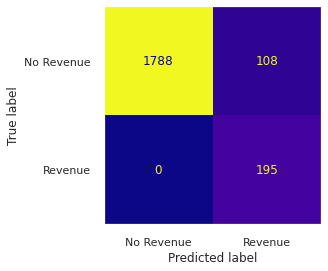

In [ ]:
randomForestModel = RandomForestClassifier(max_depth=2, random_state=0,class_weight="balanced")
randomForestModel.fit(X_train, y_train)
randomForestPrediction=randomForestModel.predict(X_test)

printMetrics(y_test,randomForestPrediction)
plot_confusion_matrix(randomForestModel,X_test,y_test, display_labels=['No Revenue', 'Revenue'],cmap="plasma",colorbar=False)
plt.grid(False)

Once again, using RF - although Accuracy is great, Precision is moderate. It also seems to me that if our Test set is not created well, it doesn't matter what model we use - it will be difficult to get a good precision.

Task 2

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
onlineShoppersClusteringDf=OS_DF.copy()
TARGET_NAME='Revenue'

In [ ]:
# Scale the data so every column has the same "importance" in the next PCA step

standardScaler = StandardScaler()
# #Columns to normalize
normalizedFeaturesColumnNames=["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates",'ExitRates']
normalizedFeatures=onlineShoppersClusteringDf[normalizedFeaturesColumnNames].copy()
normalizedData = trans.fit_transform(normalizedFeatures)
onlineShoppersClusteringDf[normalizedFeaturesColumnNames]=normalizedData
print("Normalized data shape : {}".format(onlineShoppersClusteringDf.shape))

#Take PCA for the 85% explicability of the data
pca = PCA(n_components = 0.85)
pca.fit(normalizedData)
pcaReducedDf = pca.transform(normalizedData)

print("PCA reduced data shape : {}".format(pcaReducedDf.shape))

Normalized data shape : (12330, 21)
PCA reduced data shape : (12330, 4)


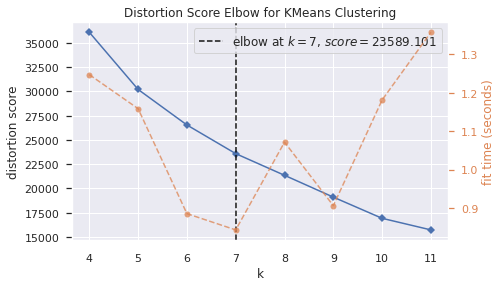

In [ ]:
kMeansModel = KMeans()
visualizer = KElbowVisualizer(kMeansModel, k=(4,12))
visualizer.fit(pcaReducedDf)
visualizer.show() 

In [ ]:
kmeansModel = KMeans(n_clusters=7, random_state=2021)
kmeansPrediction= kmeansModel.fit(pcaReducedDf)
clusterIds = kmeansPrediction.labels_
### END CODE HERE ###
print('The unique cluster ids are ', np.unique(clusterIds))

The unique cluster ids are  [0 1 2 3 4 5 6]


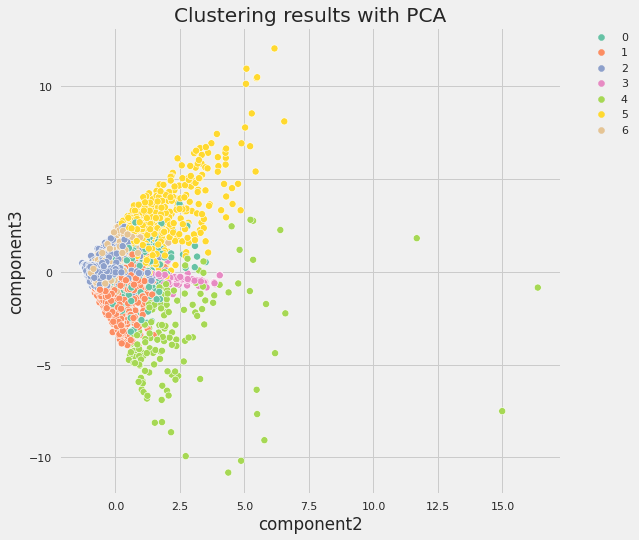

In [ ]:
clusterVisualizationDf=pd.DataFrame(pcaReducedDf,columns=["component1", "component2","component3","component4"])
clusterVisualizationDf["ClusterId"]=clusterIds
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot("component2","component3",s=50,data=clusterVisualizationDf,hue="ClusterId",
palette="Set2")
scat.set_title("Clustering results with PCA")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

Best clusters are yellow, light green, orange, blue, and pink.

We can use the cluster id as a column in the dataframe and add the target back in to find group of good buyers.

In [ ]:
onlineShoppersClusteringDf['Revenue'] = y
onlineShoppersClusteringDf['ClusterID'] = clusterIds
onlineShoppersClusteringDf.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue,ClusterID
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,0.0,0.0,...,1,1,1,1,0,0,0,1,0,3
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,0.0,0.0,...,2,2,1,2,0,0,0,1,0,2
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,0.0,0.0,...,4,1,9,3,0,0,0,1,0,3
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,0.0,0.0,...,3,2,2,4,0,0,0,1,0,2
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,0.0,0.0,...,3,3,1,4,1,0,0,1,0,2
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.543757,-0.132035,-0.380935,0.0,0.0,...,2,2,1,3,0,0,0,1,0,2
6,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,0.0,0.4,...,2,4,3,3,0,0,0,1,0,3
7,-0.395938,-0.457191,-0.396478,-0.244931,-0.713488,-0.624348,3.667189,3.229316,0.0,0.0,...,1,2,1,5,1,0,0,1,0,3
8,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.605012,-0.457683,1.171473,0.0,0.8,...,2,2,2,3,0,0,0,1,0,2
9,-0.696993,-0.457191,-0.396478,-0.244931,-0.646033,-0.238685,-0.457683,-0.429072,0.0,0.4,...,2,4,1,2,0,0,0,1,0,2


Representation percentages by cluster : 
0     4.257908
1     8.450933
2    54.882401
3     7.453366
4     1.216545
5     3.844282
6    19.894566
Name: 0, dtype: float64


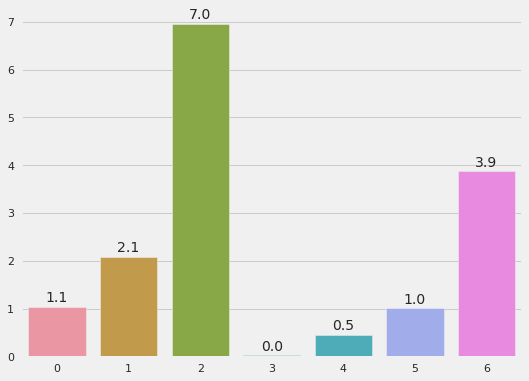

In [ ]:
def getTargetPercentageByCluster(data,targetName : str) -> dict:
    clusterIdName="ClusterID"
    targetByCluster=dict()
    nSamples=data.shape[0]
    percentagesByCluster=(data.groupby(clusterIdName).size().reset_index().iloc[:,1]/nSamples)*100
    print("Representation percentages by cluster : \n{}".format(percentagesByCluster))
    for clusterId in data[clusterIdName].unique():
        purchasePercentage=((data[(data[targetName] == 1) & (data[clusterIdName] == clusterId)].shape[0])/nSamples)*100
        targetByCluster[clusterId]=round(purchasePercentage,2)

    return targetByCluster


def plotTargetPercentageByCluster(targetPercentagesByCluster : dict):
    plt.figure(figsize=(8, 6))
    sbarplot=sns.barplot(x=list(targetPercentagesByCluster.keys()),y=list(targetPercentagesByCluster.values()))
    for p in sbarplot.patches:
        sbarplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') 
plt.xlabel("Cluster id", size=14)
plt.ylabel("Target percentage", size=14)  
plt.close()

targetPercentagesByCluster=getTargetPercentageByCluster(onlineShoppersClusteringDf,'Revenue')
plotTargetPercentageByCluster(targetPercentagesByCluster)

In [ ]:
onlineShoppersClusteringDf.head(6)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue,ClusterID
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,0.0,0.0,...,1,1,1,1,0,0,0,1,0,3
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,0.0,0.0,...,2,2,1,2,0,0,0,1,0,2
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,0.0,0.0,...,4,1,9,3,0,0,0,1,0,3
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,0.0,0.0,...,3,2,2,4,0,0,0,1,0,2
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,0.0,0.0,...,3,3,1,4,1,0,0,1,0,2
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.543757,-0.132035,-0.380935,0.0,0.0,...,2,2,1,3,0,0,0,1,0,2


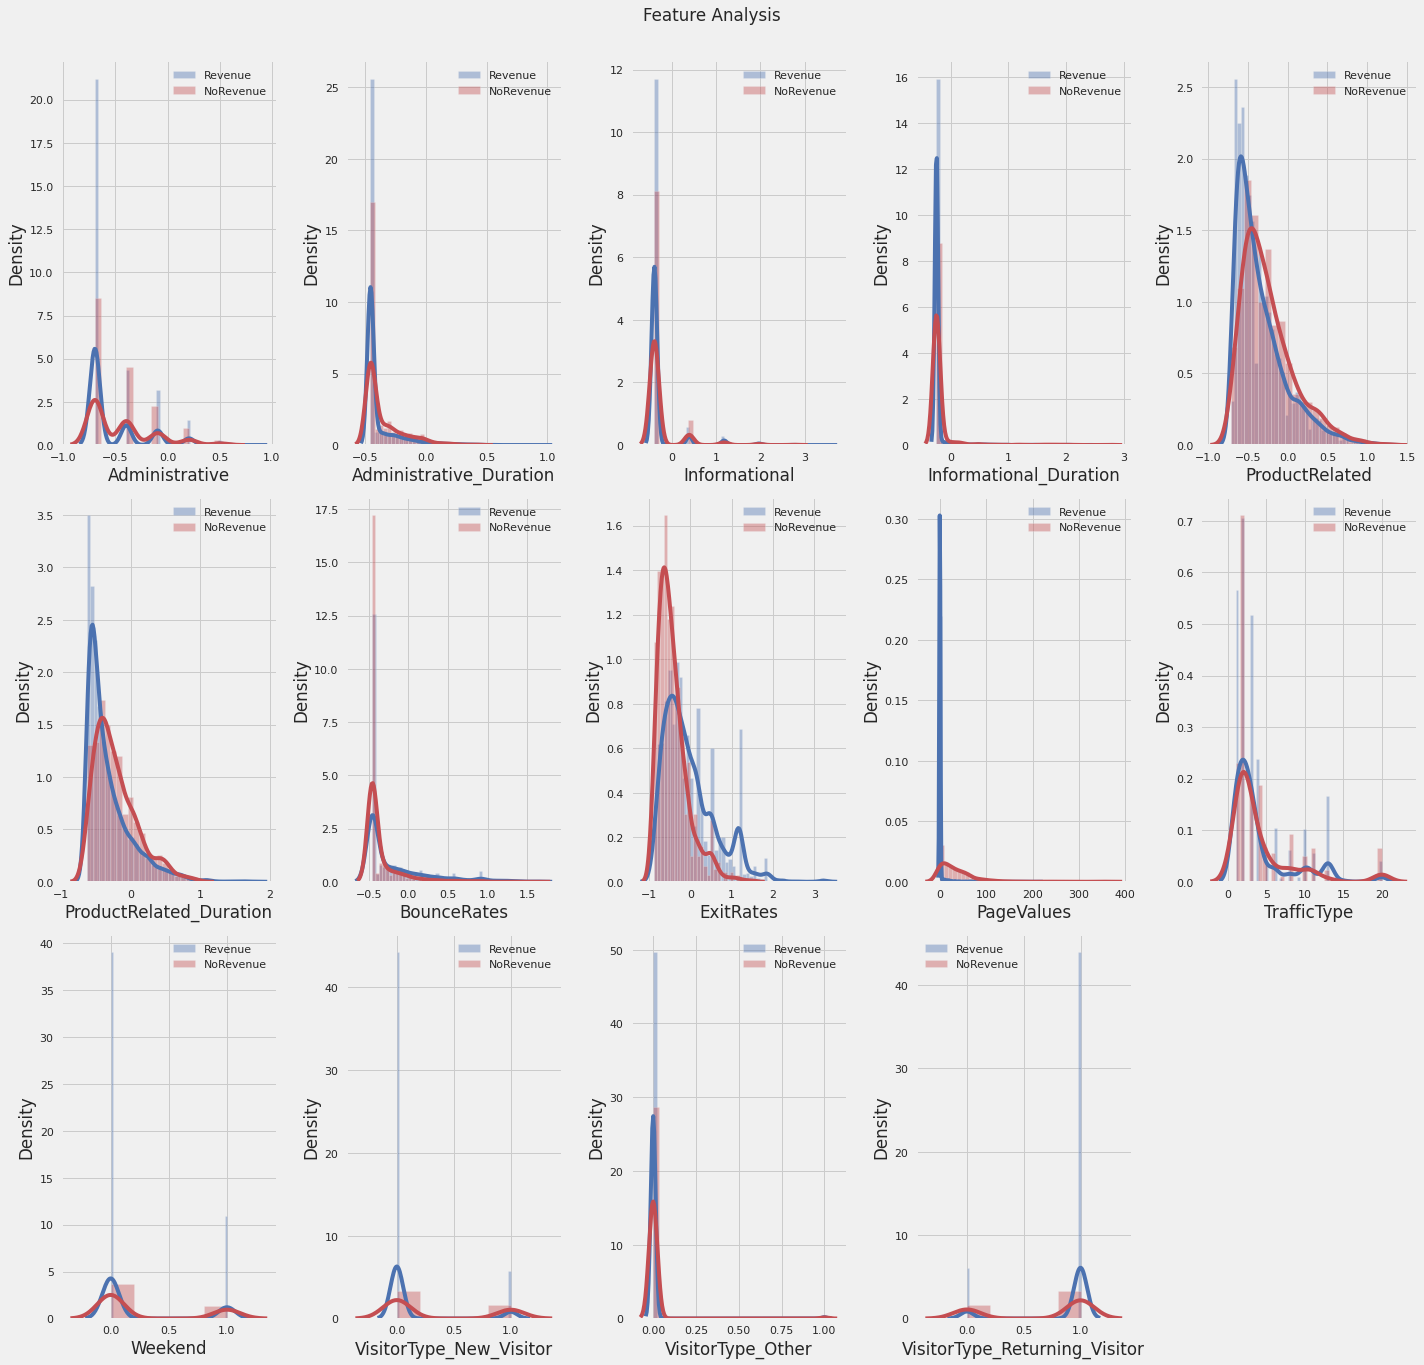

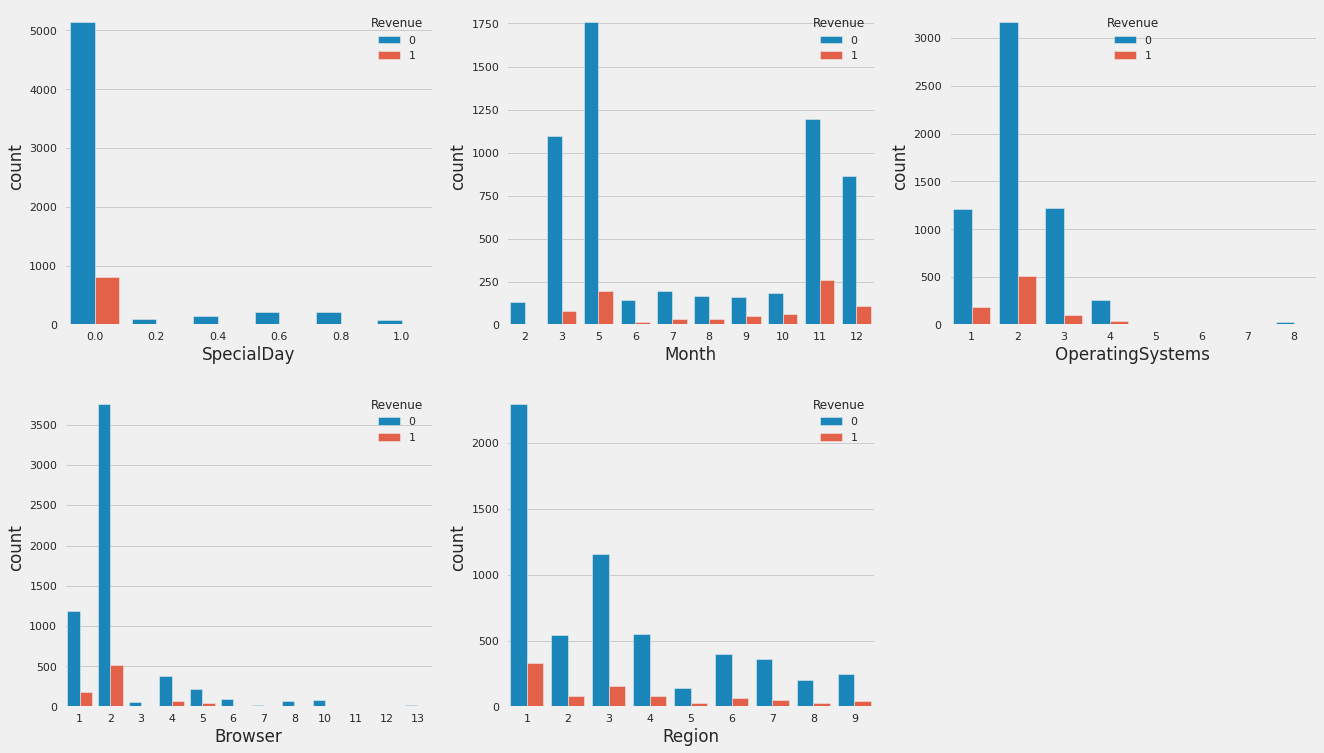

In [ ]:
import warnings
warnings.filterwarnings('ignore')
discreteColumns=['SpecialDay','Month','OperatingSystems','Browser','Region']
result = onlineShoppersClusteringDf.loc[onlineShoppersClusteringDf['ClusterID'] == 2]


fig = plt.figure(figsize = (20, 25))
j = 0

columnsToPlot=result.columns.to_list()
columnsToPlot = [ elem for elem in columnsToPlot if elem not in discreteColumns]
columnsToPlot.remove(TARGET_NAME)
columnsToPlot.remove('ClusterID')
for item in columnsToPlot:
    plt.subplot(4, 5, j+1)
    j += 1
    sns.distplot(result[item][result[TARGET_NAME]==0], color='b', label = TARGET_NAME)
    sns.distplot(result[item][result[TARGET_NAME]==1], color='r', label = 'No'+TARGET_NAME)
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

fig = plt.figure(figsize = (20, 12))
t=0
for feature in discreteColumns:
    plt.subplot(2, 3, t+1)
    t += 1
    sns.countplot(x=feature, hue=TARGET_NAME, data=result)


Seems that Revenue is better during week days. Visitors that are repeats are more Revenue positive. 


Task 3


In [ ]:
from sklearn.semi_supervised import LabelSpreading

In [ ]:
semiSupervisedDf=onlineShoppersDf.copy()
semiSupervisedDf["Revenue"]=y
semiSupervisedDf.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,1,1,1,1,0,0,0,0,1
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,2,1,2,0,0,0,0,1


In [ ]:
labeledData=semiSupervisedDf[semiSupervisedDf['Month'].isin([6,7,8,9])]
unlabeledData=semiSupervisedDf[semiSupervisedDf['Month'].isin([10,11,12])]
test_y=unlabeledData["Revenue"]

#Miss label the data
unlabeledData=unlabeledData.drop("Revenue",axis=1)
unlabeledData["Revenue"] = -1
unlabeledData.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue
5455,0,0.0,0,0.0,1,207.570248,0.0,0.007937,0.000000,0.0,10,2,2,1,5,0,0,0,1,-1
5457,1,63.4,0,0.0,3,120.400000,0.0,0.000000,42.293068,0.0,10,1,1,3,3,0,1,0,0,-1
5461,7,56.3,0,0.0,15,315.400000,0.0,0.011111,0.000000,0.0,10,2,2,1,2,0,1,0,0,-1
5463,1,39.2,2,120.8,7,80.500000,0.0,0.010000,0.000000,0.0,11,3,2,4,2,1,1,0,0,-1
5464,3,89.6,0,0.0,57,1721.906667,0.0,0.005932,204.007949,0.0,11,2,2,1,4,1,0,0,1,-1


In [ ]:
print("Labeled data shape : {}".format(labeledData.shape))
print("Unlabeled data shape : {}".format(test_y.shape))

Labeled data shape : (1601, 20)
Unlabeled data shape : (5274,)


In [ ]:
train_y=pd.concat([labeledData[TARGET_NAME],unlabeledData[TARGET_NAME]], axis=0, join="inner")
trainX=pd.concat([labeledData,unlabeledData], axis=0, join="inner").drop(TARGET_NAME,axis=1)

In [ ]:
n_neighbors=[2,3,5,7,9,11]

def findBestNeightBor(data,labels,n):
  SIGNIFICANT_DECIMAL=5

  bestRecall=-1
  bestNeightbors=n[0]
  for neighbor in n_neighbors: 
    lblSpreadingModel=LabelSpreading(alpha=0.05,n_neighbors=neighbor,kernel='knn')
    lblSpreadingModel.fit(data, labels)
    labelsPredicted=lblSpreadingModel.predict(data)
    reLabeledValues=lblSpreadingModel.transduction_
    currentlyRecall=recall(reLabeledValues, labelsPredicted,average='weighted')
    print("For n_neighbors : {} the recall is {} and the last was {}".format(neighbor,np.round(currentlyRecall,SIGNIFICANT_DECIMAL),np.round(bestRecall,SIGNIFICANT_DECIMAL)))
    if  np.round(currentlyRecall,SIGNIFICANT_DECIMAL) > np.round(bestRecall,SIGNIFICANT_DECIMAL):
      bestRecall=currentlyRecall
      bestNeightbors=neighbor
  return bestRecall,bestNeightbors

best_recall_score,bestNeighbors=findBestNeightBor(trainX,train_y,n_neighbors)
### END CODE HERE ###
print(f"best_recall: {best_recall_score:.4f}, best n_neighbors: {bestNeighbors}")

For n_neighbors : 2 the recall is 0.98647 and the last was -1
For n_neighbors : 3 the recall is 0.98545 and the last was 0.98647
For n_neighbors : 5 the recall is 0.96087 and the last was 0.98647
For n_neighbors : 7 the recall is 0.94822 and the last was 0.98647
For n_neighbors : 9 the recall is 0.94051 and the last was 0.98647
For n_neighbors : 11 the recall is 0.93905 and the last was 0.98647
best_recall: 0.9865, best n_neighbors: 2


In [ ]:
lblSpreadingModelFinal=LabelSpreading(alpha=0.01,n_neighbors=bestNeighbors,kernel='knn')
lblSpreadingModelFinal.fit(trainX, train_y)

#Predict the labels and get it
labelsTransduction=lblSpreadingModelFinal.transduction_

Accuracy = 0.7874478574137277, Precision = 0.7263812690707456, Recall = 0.7874478574137277, F1-score = 0.7271101950992611


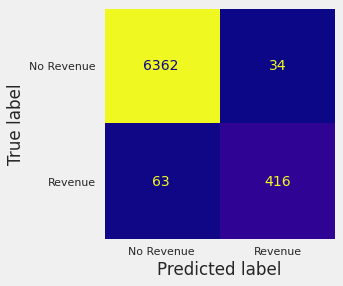

In [ ]:
misslabeledTransduction=labelsTransduction[labeledData.shape[0]:]

acc  = accuracy(test_y, misslabeledTransduction)
rec  = recall(test_y, misslabeledTransduction,average='weighted')
prec = precision(test_y, misslabeledTransduction,average='weighted')
f1   = f1_score(test_y, misslabeledTransduction,average='weighted')
### END CODE HERE ###
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')

plot_confusion_matrix(lblSpreadingModelFinal,trainX,labelsTransduction, display_labels=['No Revenue', 'Revenue'],cmap="plasma",colorbar=False)
plt.grid(False)

In [ ]:
#Prepare test data
testData=semiSupervisedDf[semiSupervisedDf['Month'].isin([2,3])]
trueLabelstestData=testData.pop("Revenue")

testData.head(4)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0,1


In [ ]:
#Predict the labels
testDataPredictions=lblSpreadingModelFinal.predict(testData)

Accuracy = 0.8971783835485414, Precision = 0.8767758973836888, Recall = 0.8971783835485414, F1-score = 0.8843802308607615


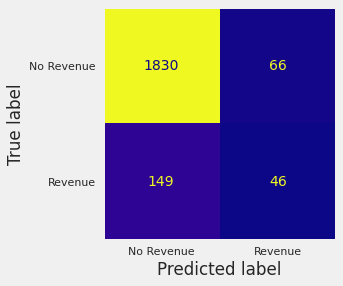

In [ ]:
acc  = accuracy(trueLabelstestData, testDataPredictions)
rec  = recall(trueLabelstestData, testDataPredictions,average='weighted')
prec = precision(trueLabelstestData, testDataPredictions,average='weighted')
f1   = f1_score(trueLabelstestData, testDataPredictions,average='weighted')
### END CODE HERE ###
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')

plot_confusion_matrix(lblSpreadingModelFinal,testData,trueLabelstestData, display_labels=['No Revenue', 'Revenue'],cmap="plasma",colorbar=False)
plt.grid(False)

In [ ]:
originalLabeledData=semiSupervisedDf.copy()
y=originalLabeledData.pop("Revenue")


lblSpreadingOriDataModel=LabelSpreading(alpha=0.05,n_neighbors=bestNeighbors,kernel='knn')
lblSpreadingOriDataModel.fit(originalLabeledData, y)

LabelSpreading(alpha=0.05, kernel='knn', n_neighbors=2)

Accuracy = 0.9368723098995696, Precision = 0.9303776451552636, Recall = 0.9368723098995696, F1-score = 0.9288917711613832


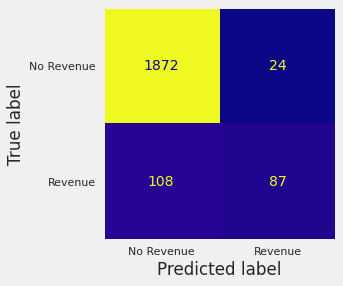

In [ ]:
testDataPredictions=lblSpreadingOriDataModel.predict(testData)

acc  = accuracy(trueLabelstestData, testDataPredictions)
rec  = recall(trueLabelstestData, testDataPredictions,average='weighted')
prec = precision(trueLabelstestData, testDataPredictions,average='weighted')
f1   = f1_score(trueLabelstestData, testDataPredictions,average='weighted')
### END CODE HERE ###
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')

plot_confusion_matrix(lblSpreadingOriDataModel,testData,trueLabelstestData, display_labels=['No Revenue', 'Revenue'],cmap="plasma",colorbar=False)
plt.grid(False)